# Capstone Project: Predicting Coronary Heart Disease Using Logistic Regression

 ### Objective:
 
To develop a logistic regression model that predicts the presence of coronary heart disease (CHD) using the given dataset.

##### Step 1: Project Setup


In [119]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve


##### Step 2: Load & Explore Data

In [120]:
# Load dataset
df = pd.read_csv('train.csv')

# Preview data
print(df.head())
print(df.info())
print(df.describe())


   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0 

In [121]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

##### Step 3: Data Cleaning & Preprocessing

            glucose  TenYearCHD
glucose      1.0000      0.1382
TenYearCHD   0.1382      1.0000


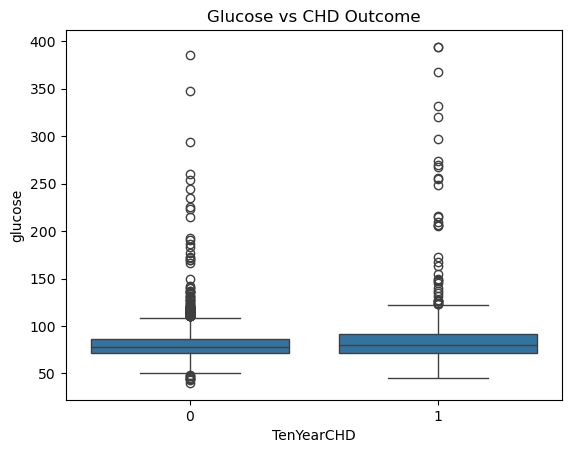

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quick correlation check
correlation = df[['glucose', 'TenYearCHD']].corr()
print(correlation)

# Boxplot to visualize relationship
sns.boxplot(x='TenYearCHD', y='glucose', data=df)
plt.title('Glucose vs CHD Outcome')
plt.show()


In [123]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())


In [124]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Step 4 EDA Exploratory Data Analysis

#### Univariate Analysis
##### Numerical Variables:
Check the distribution of numerical variables using histograms.

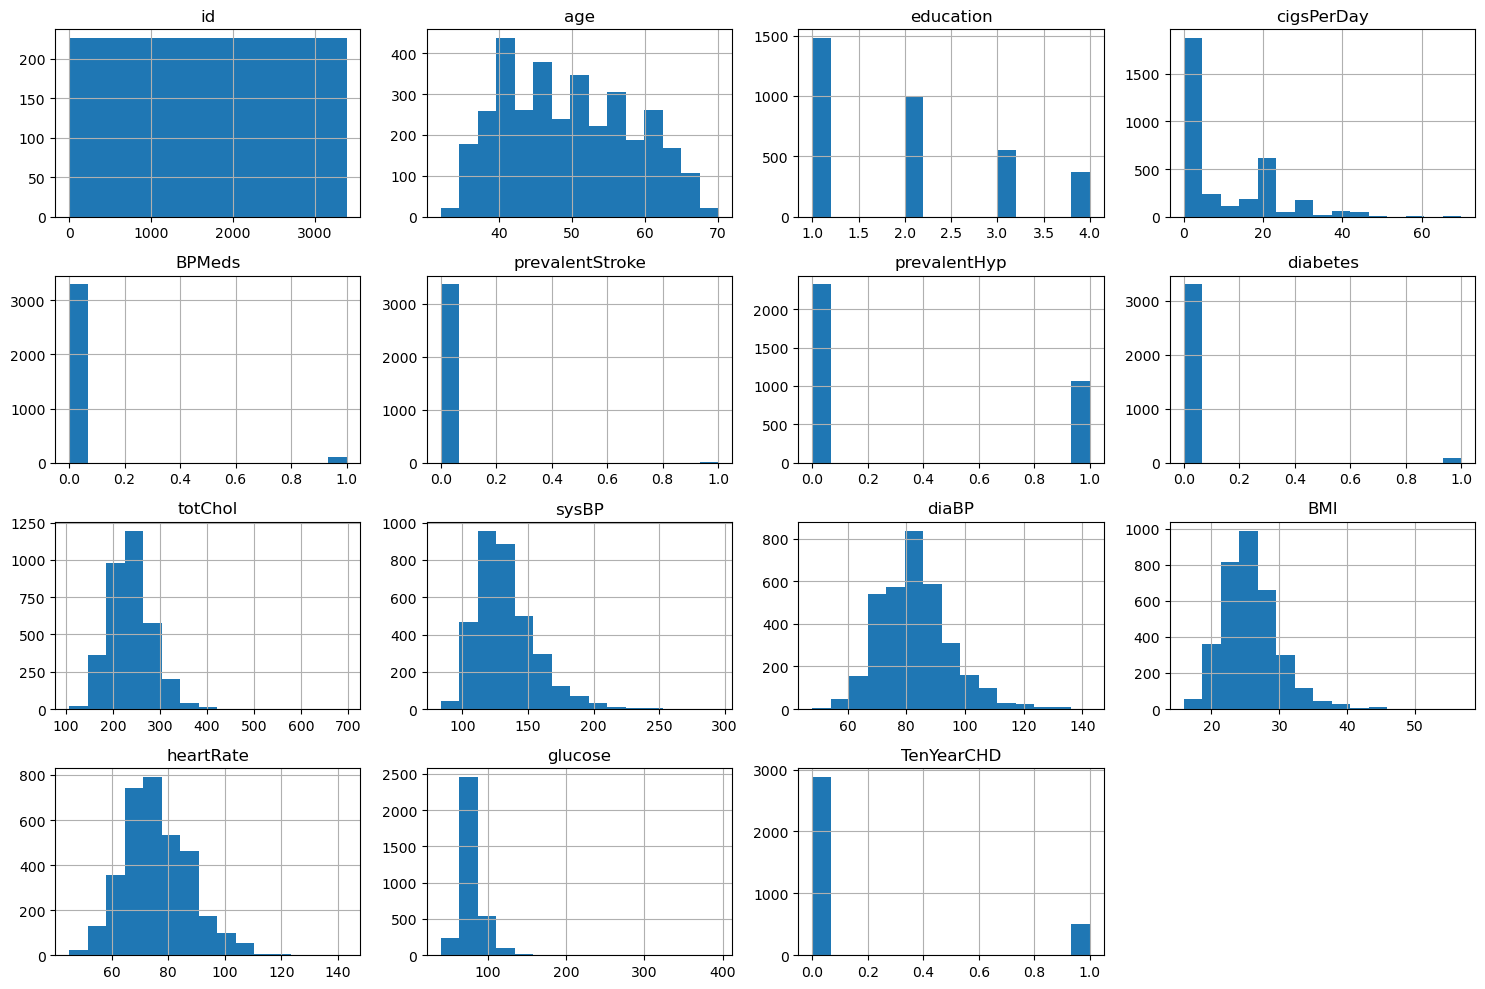

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for numerical variables
df.select_dtypes(include=['float64', 'int64']).hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


#### Categorical Variables:
Visualize counts of each category using bar plots.

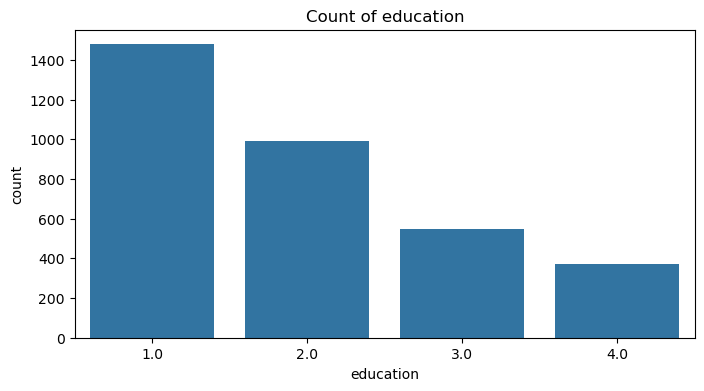

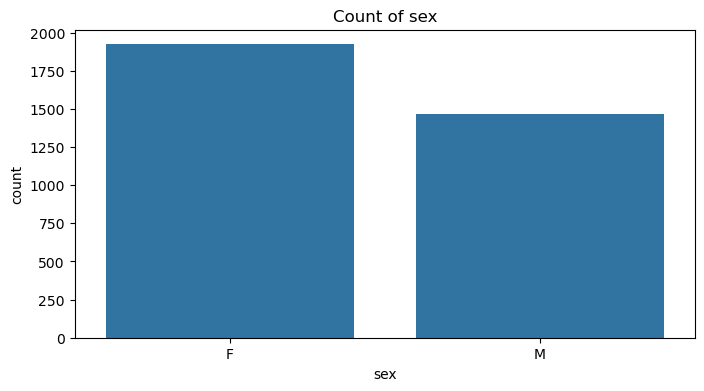

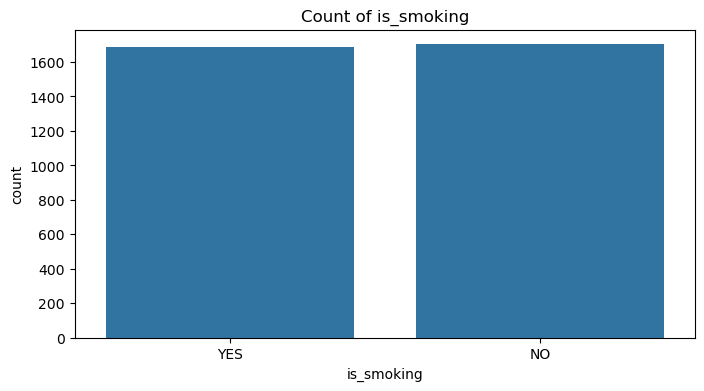

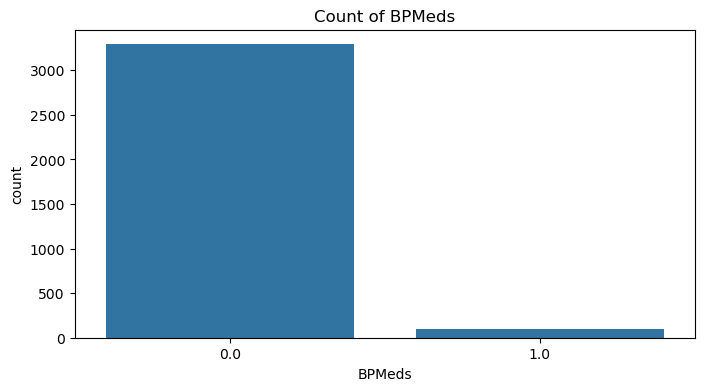

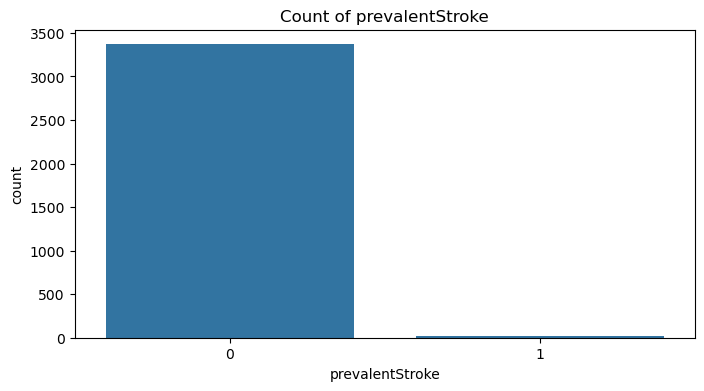

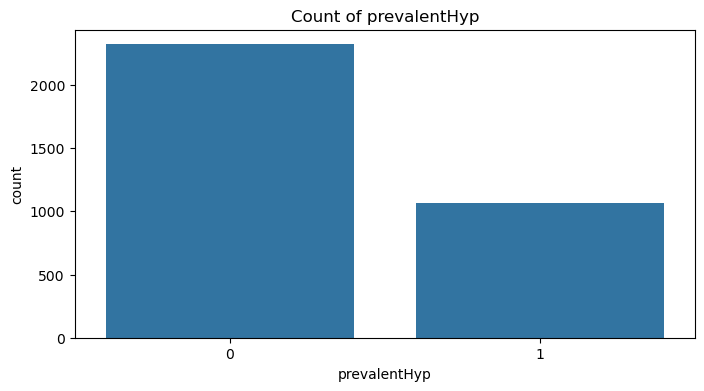

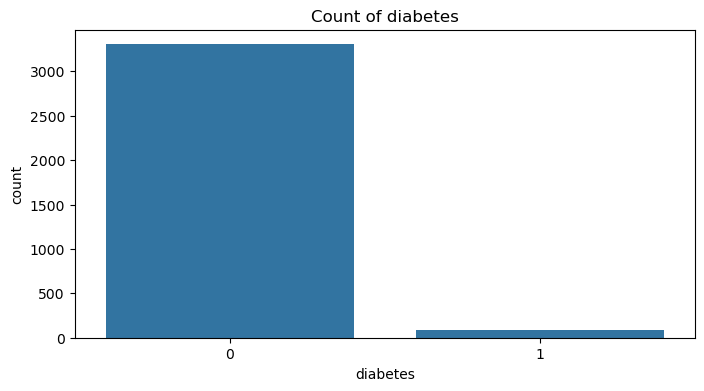

In [126]:
# Plotting bar charts for categorical variables
categorical_cols = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()


### 2. Bivariate Analysis
Relationship between Features and Target (TenYearCHD):
For Numerical Features:

Plot box plots to compare the distributions of each feature for different CHD outcomes (TenYearCHD).

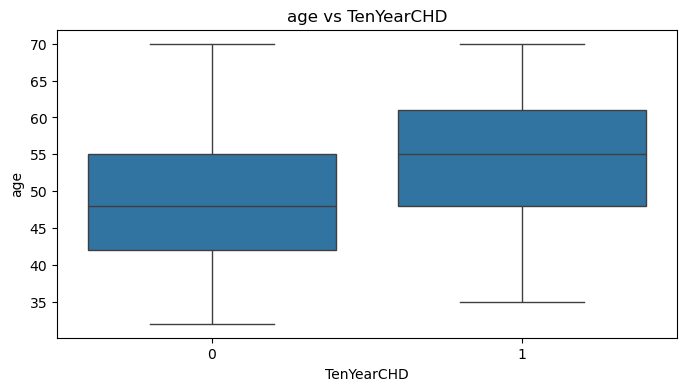

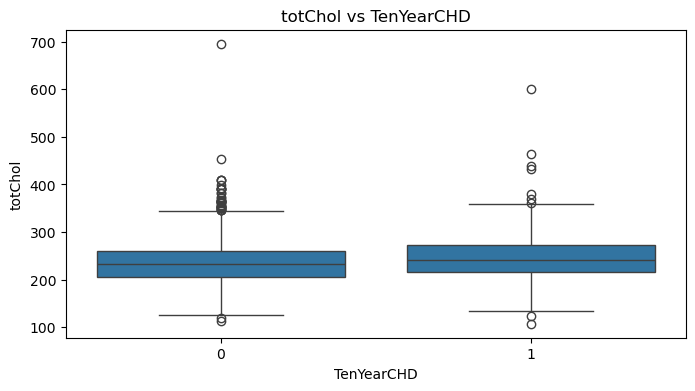

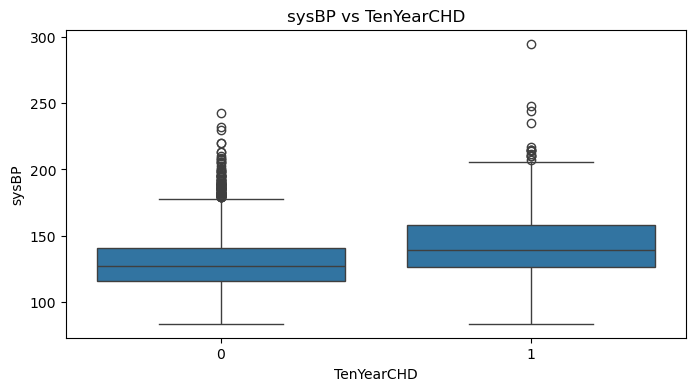

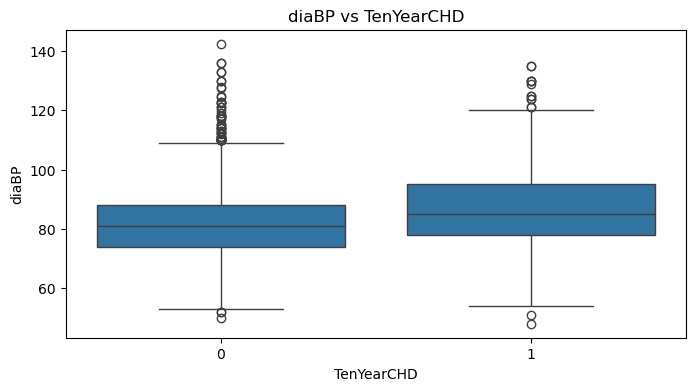

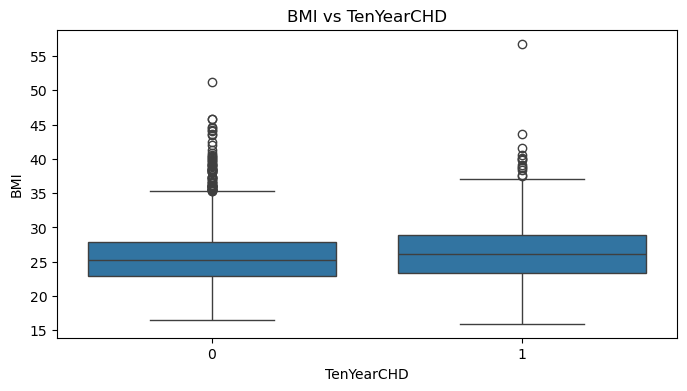

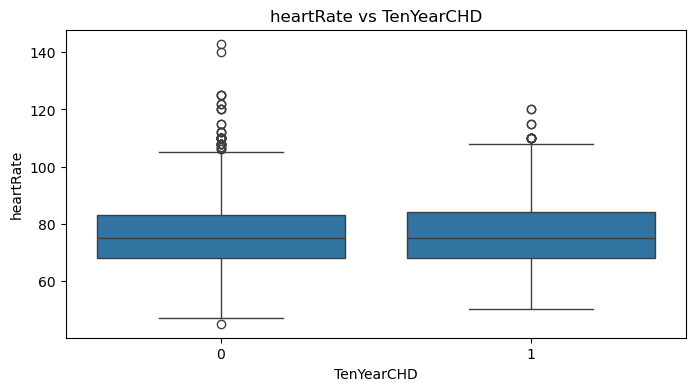

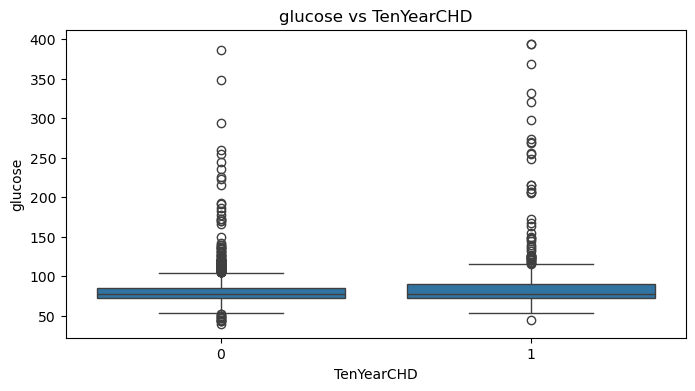

In [127]:
# Boxplots for numerical features vs TenYearCHD
numerical_cols = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='TenYearCHD', y=col, data=df)
    plt.title(f'{col} vs TenYearCHD')
    plt.show()


In [128]:
print(df.columns)


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


##### For Categorical Features:

Using count plots to compare the distribution of categorical variables across the TenYearCHD classes.

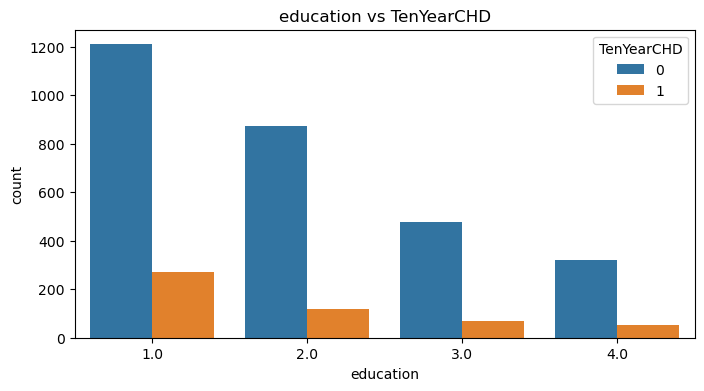

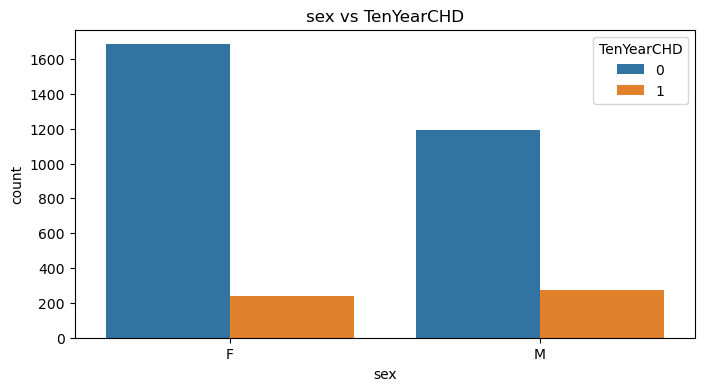

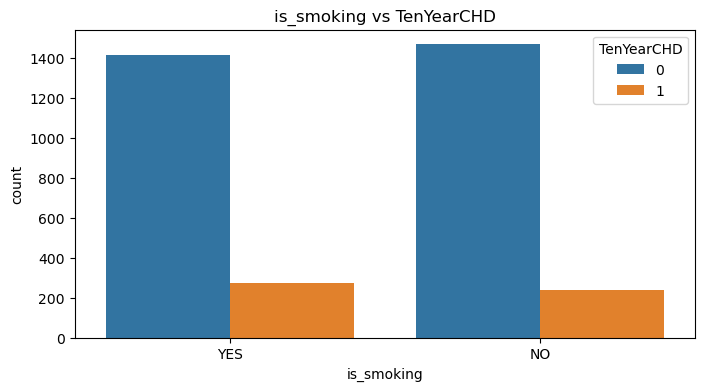

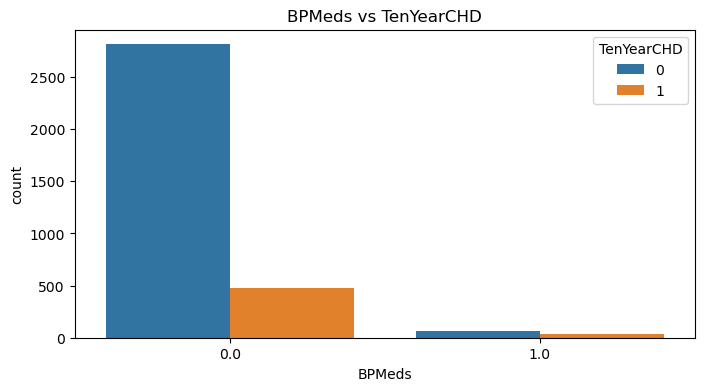

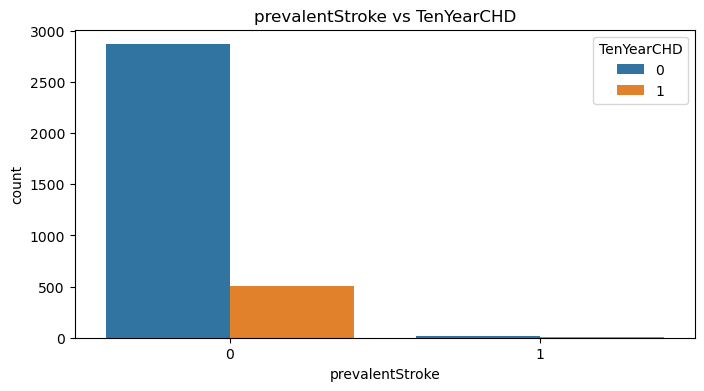

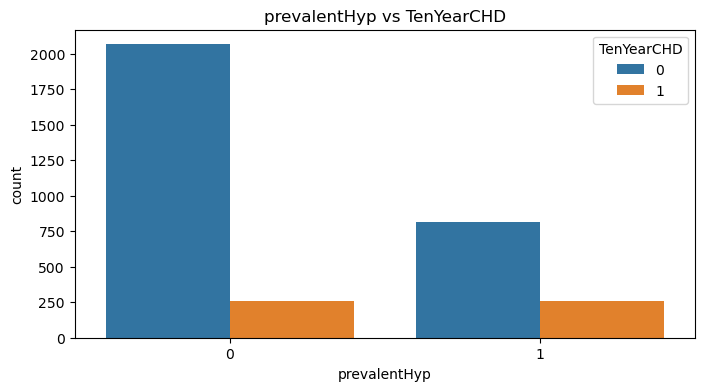

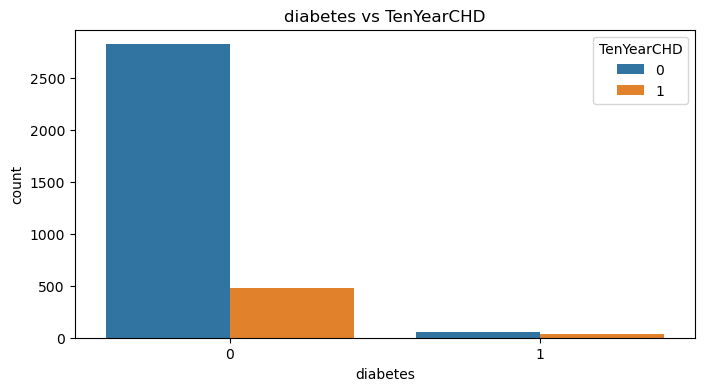

In [129]:
# Countplots for categorical features vs TenYearCHD
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='TenYearCHD', data=df)
    plt.title(f'{col} vs TenYearCHD')
    plt.show()


#### 3. Correlation Matrix
Check the correlation between numerical variables to identify multicollinearity or highly correlated features.

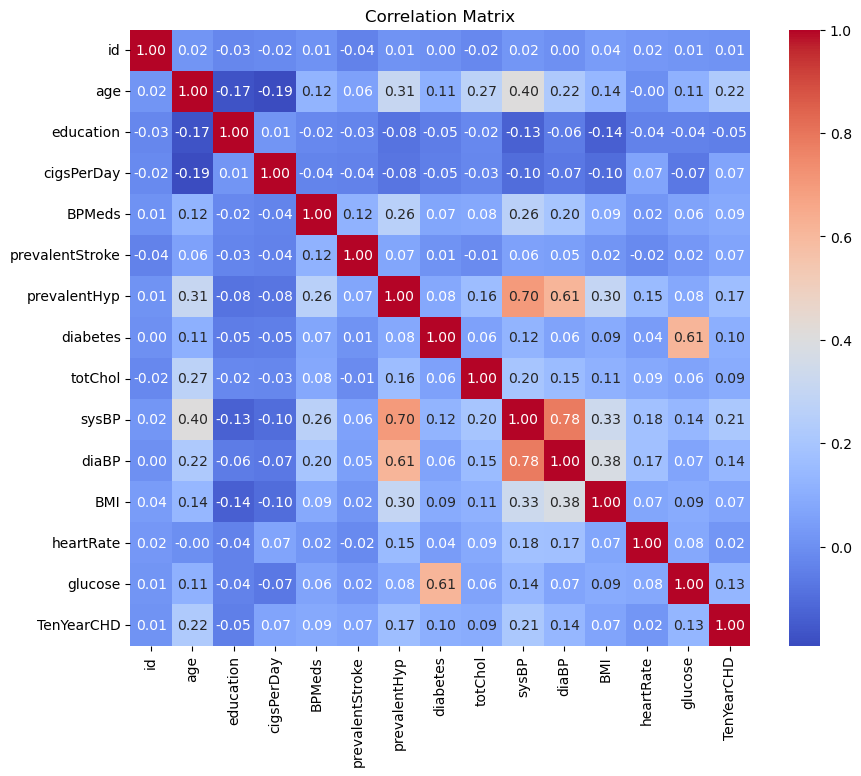

In [130]:
# Compute correlation matrix only on numerical columns
numerical_df = df.select_dtypes(include='number')
corr_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()



#### Key Observations:
Top positively correlated features with TenYearCHD:

- age (0.22): Older individuals are more likely to develop CHD.

- prevalentHyp (0.21): People with hypertension show a higher CHD risk.

- sysBP (0.21) and diaBP (0.14): Systolic and diastolic blood pressure are relevant.

- glucose (0.13): Higher glucose levels are mildly associated with CHD.

Weak or negligible correlation:

- education, heartRate, and totChol show low correlation.

- id should be dropped, as it’s just an identifier.

#### Count Plots for Categorical Variables

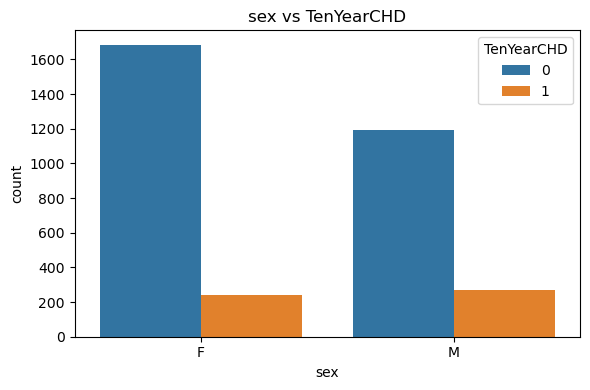

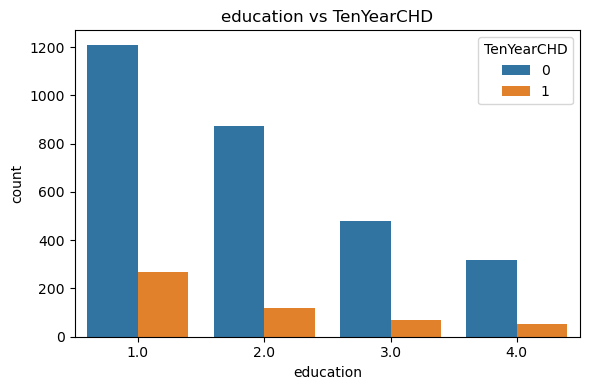

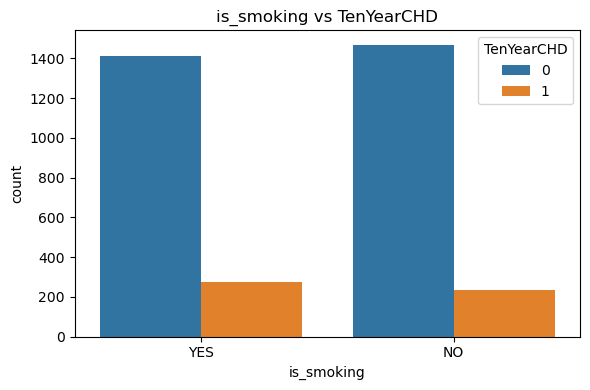

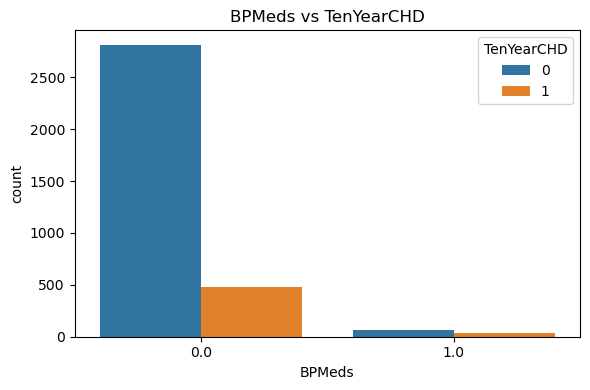

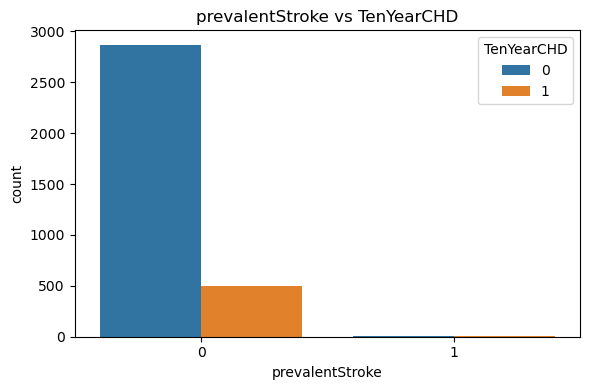

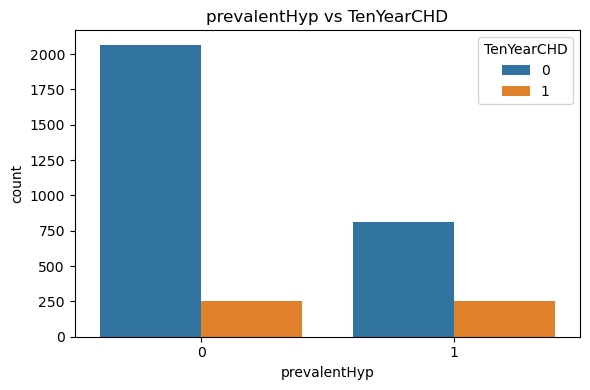

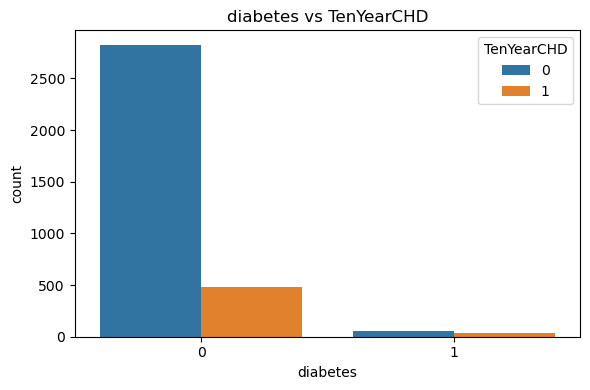

In [131]:
# List of categorical variables
categorical_cols = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Create count plots
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='TenYearCHD', data=df)
    plt.title(f'{col} vs TenYearCHD')
    plt.legend(title='TenYearCHD')
    plt.tight_layout()
    plt.show()


In [132]:
# Drop Id coloumn
df = df.drop(columns=['id'])


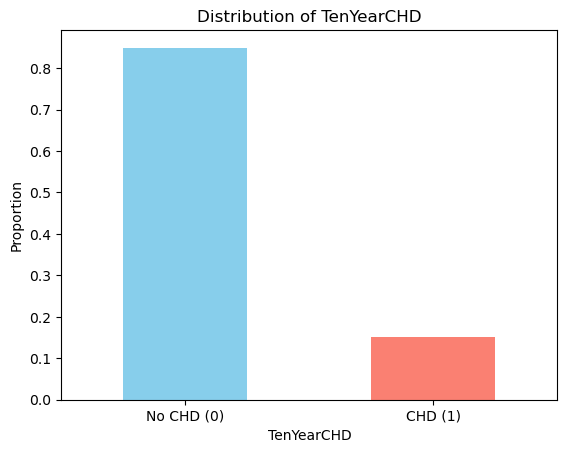

TenYearCHD
0    2879
1     511
Name: count, dtype: int64
TenYearCHD
0    84.93%
1    15.07%
Name: proportion, dtype: object


In [133]:
# Check the distribution of the target variable
df['TenYearCHD'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of TenYearCHD')
plt.xticks(ticks=[0, 1], labels=['No CHD (0)', 'CHD (1)'], rotation=0)
plt.ylabel('Proportion')
plt.show()

# Display exact counts and percentages
print(df['TenYearCHD'].value_counts())
print(df['TenYearCHD'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))


 #### Interpretation of TenYearCHD and Education
From our data:

0 = No CHD in 10 years

1 = Yes, CHD developed in 10 years

We have:

2,879 people (84.93%) without CHD over 10 years.

511 people (15.07%) developed CHD within 10 years.

This means CHD risk is relatively low in the dataset, but still significant enough to analyze trends by factors like education.

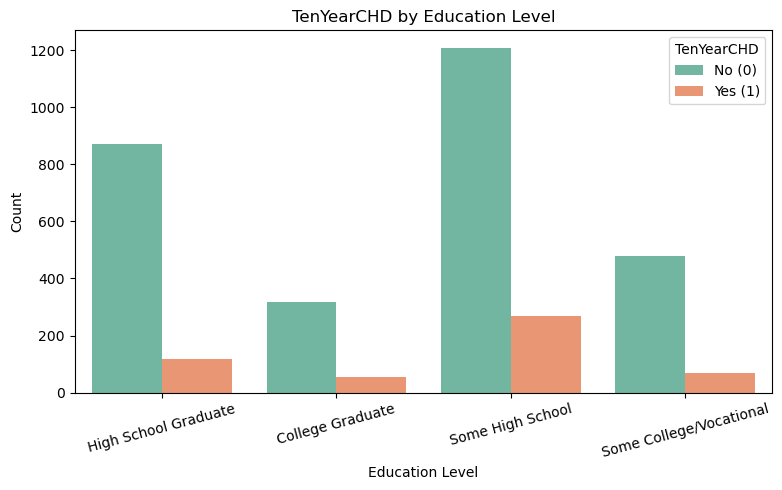

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map education levels for readability
education_map = {
    1: 'Some High School',
    2: 'High School Graduate',
    3: 'Some College/Vocational',
    4: 'College Graduate'
}
df['education_level'] = df['education'].map(education_map)

# Countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='education_level', hue='TenYearCHD', data=df, palette='Set2')
plt.title('TenYearCHD by Education Level')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.xticks(rotation=15)
plt.legend(title='TenYearCHD', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()


### Proportion of CHD cases per education level (percentage)

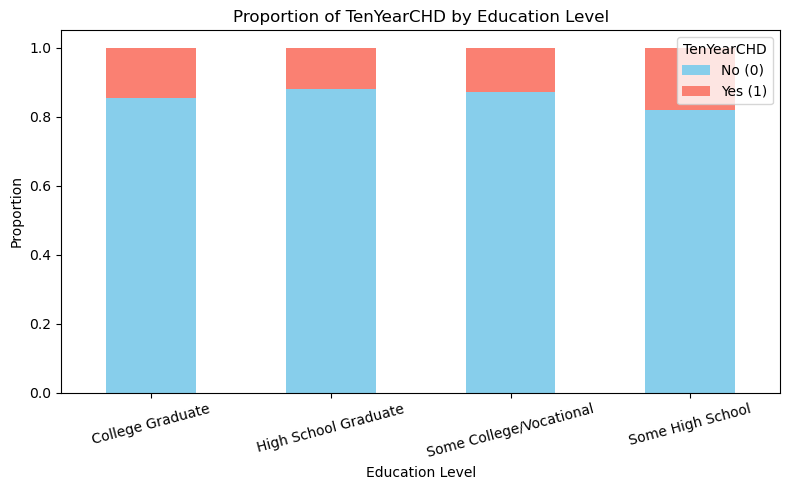

In [135]:
# Calculate proportions
edu_chd_prop = df.groupby('education_level')['TenYearCHD'].value_counts(normalize=True).unstack()

# Plot as stacked bar chart
edu_chd_prop.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title('Proportion of TenYearCHD by Education Level')
plt.ylabel('Proportion')
plt.xlabel('Education Level')
plt.legend(title='TenYearCHD', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


#### Education Level and CHD Risk

To investigate whether educational attainment correlates with the 10-year risk of coronary heart disease (CHD), the dataset was segmented by education level, and CHD incidence was visualized using both count and proportion plots.

The education levels were categorized as follows:

1 = Some High School

2 = High School Graduate

3 = Some College or Vocational School

4 = College Graduate

Count plot analysis revealed that:

Individuals with lower education levels (1 or 2) tended to have more CHD cases.

Those with higher education (level 4) had fewer instances of CHD.

Proportionally, the stacked bar chart showed a higher percentage of CHD cases among those with less education, especially for level 1. This suggests a possible inverse relationship between education level and CHD risk.

This aligns with public health research showing that lower education is often associated with reduced health literacy, poorer access to healthcare, and higher engagement in risk factors like smoking, unhealthy diet, or physical inactivity.



#### Outliers Detection
Outliers were detected in the data. We would:

Cap outliers using the IQR method to limit their impact without deleting rows.

In [136]:
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


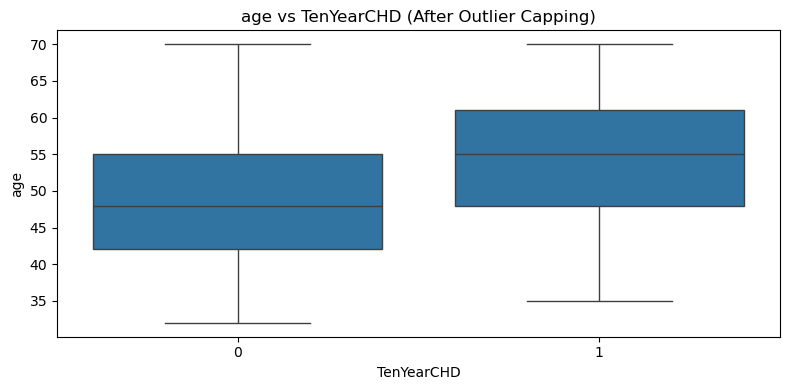

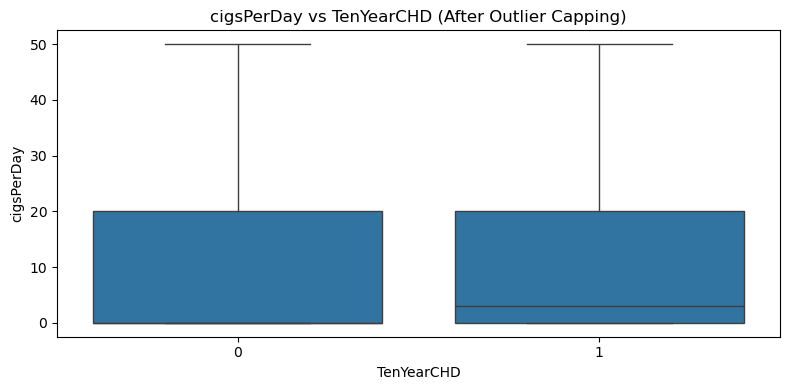

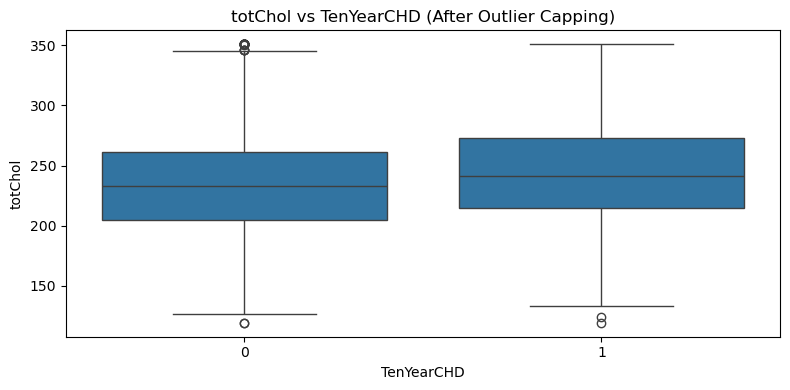

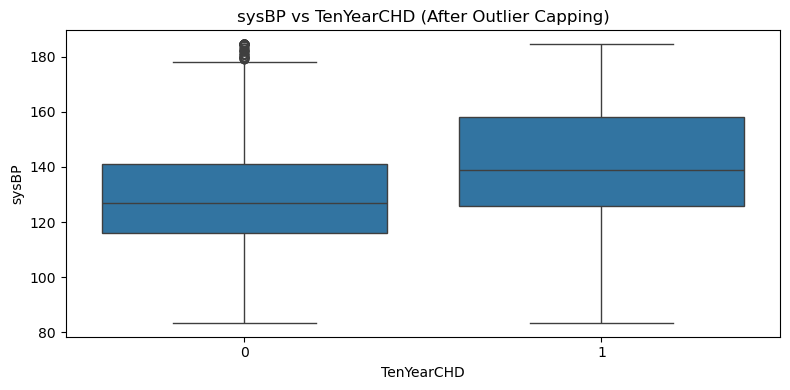

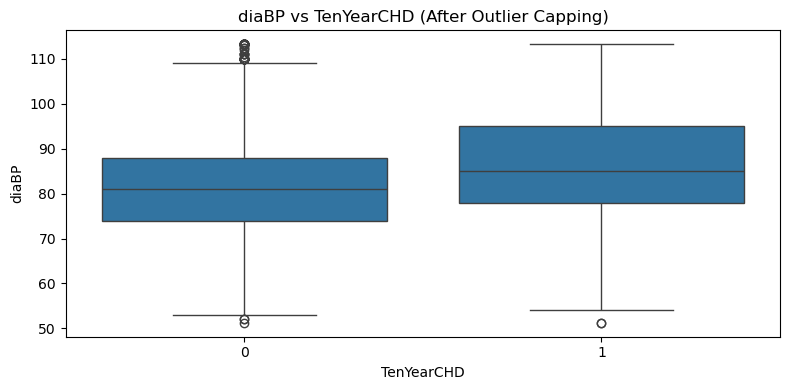

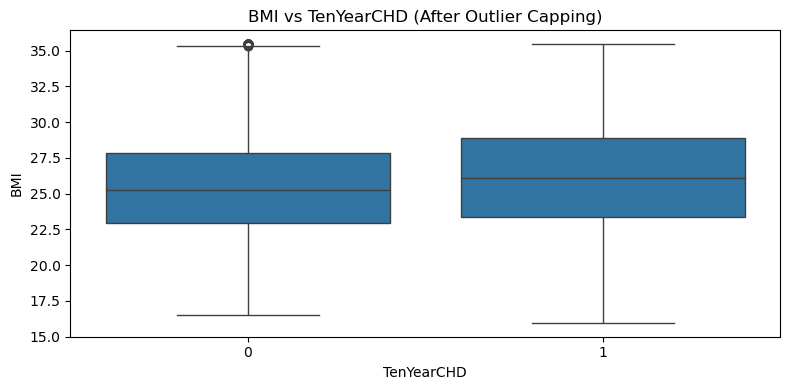

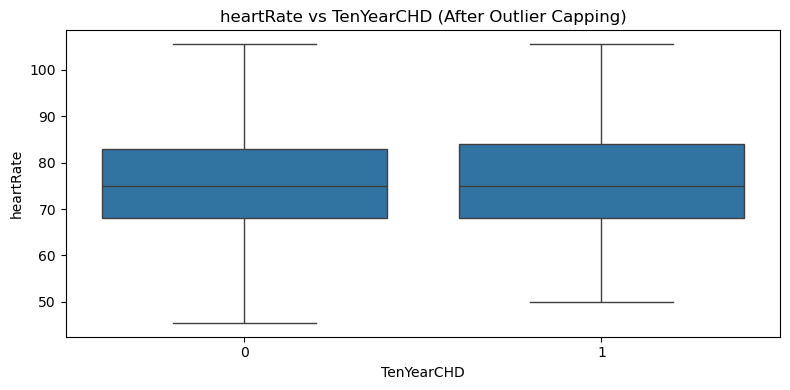

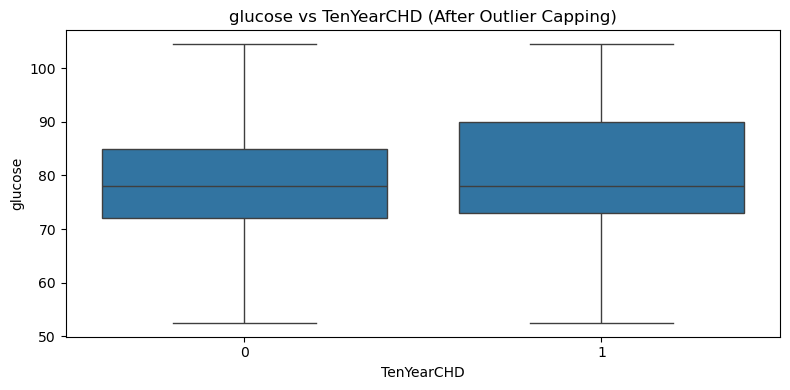

In [137]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='TenYearCHD', y=col, data=df)
    plt.title(f'{col} vs TenYearCHD (After Outlier Capping)')
    plt.tight_layout()
    plt.show()


#### Insights from Post-Capping Boxplots

- Age

Individuals with CHD (TenYearCHD = 1) tend to be older than those without.

The median age is clearly higher in the CHD group, aligning with clinical expectations.

- Cigarettes Per Day (cigsPerDay)

Slightly higher in individuals with CHD.

- Smoking remains a risk factor, but its effect might be more prominent when combined with other variables.

- Total Cholesterol (totChol)

No significant visual separation between CHD and non-CHD groups.

Suggests total cholesterol alone may not strongly differentiate risk in this dataset.

- Systolic Blood Pressure (sysBP)

Clear difference: CHD group has a higher median and upper range.

Confirms that elevated systolic pressure is a key risk factor.

- Diastolic Blood Pressure (diaBP)

Similar to systolic BP but less pronounced.

Slight elevation in CHD group, supporting its moderate role in risk assessment.

- Body Mass Index (BMI)

Highly skewed, with overlapping distributions.

While higher BMI is slightly more frequent in CHD patients, it does not strongly separate the two classes visually.

- Heart Rate

Slightly elevated in CHD group.

Though not sharply different, higher heart rates may still contribute to model prediction.

- Glucose

Clear upward shift in the CHD group.

Indicates that hyperglycemia or diabetes is a relevant predictor.

#### Overall Summary

Strong predictors based on visual differences: age, sysBP, and glucose.

Moderate indicators: cigsPerDay, diaBP, heartRate.

Less visually distinctive but still valuable: BMI, totChol.

In [138]:
df.dtypes

age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
education_level     object
dtype: object

In [139]:
# Display unique values in object columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


sex: ['F' 'M']
is_smoking: ['YES' 'NO']
education_level: ['High School Graduate' 'College Graduate' 'Some High School'
 'Some College/Vocational']


### Encoding & Scaling:

In [140]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Make a copy to avoid modifying the original dataframe
df_encoded = df.copy()

# Label encode binary categorical columns
label_encoders = {}
for col in ['sex', 'is_smoking']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoders in case we need to reverse or transform test data

# One-hot encode multi-class categorical column
df_encoded = pd.get_dummies(df_encoded, columns=['education_level'], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['TenYearCHD'])  # Replace with your actual target column if different
y = df_encoded['TenYearCHD']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Preview
X_scaled_df.head()


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_level_High School Graduate,education_level_Some College/Vocational,education_level_Some High School
0,1.682783,0.053058,-0.873425,1.004731,-0.509309,-0.174342,-0.080821,-0.678658,-0.162295,-0.362779,0.765478,0.196952,-0.085301,1.226815,0.044207,1.556998,-0.439593,-0.879211
1,-1.576210,2.018819,1.144919,-0.995291,-0.764767,-0.174342,-0.080821,1.473495,-0.162295,-0.572897,1.729390,1.324986,1.066765,-0.332741,-0.389669,-0.642262,-0.439593,-0.879211
2,-0.412284,-0.929822,-0.873425,1.004731,0.086760,-0.174342,-0.080821,-0.678658,-0.162295,0.314268,-0.776781,-1.017855,-1.405321,1.053531,1.259059,-0.642262,-0.439593,1.137383
3,0.053287,-0.929822,1.144919,1.004731,0.938287,-0.174342,-0.080821,1.473495,-0.162295,-0.082622,1.247434,0.457267,0.670496,-0.679309,1.259059,-0.642262,-0.439593,1.137383
4,1.682783,-0.929822,-0.873425,1.004731,1.789814,-0.174342,-0.080821,-0.678658,-0.162295,0.104150,0.211229,0.196952,0.187626,-0.506025,-0.216119,-0.642262,-0.439593,1.137383


### Train-Test Split and Logistic Regression


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[574   2]
 [ 99   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.60      0.03      0.06       102

    accuracy                           0.85       678
   macro avg       0.73      0.51      0.49       678
weighted avg       0.81      0.85      0.79       678


Accuracy Score: 0.8510324483775811


#### Interpretation of Results

-  Accuracy: 85.1%
At first glance, this looks great. But…

- The Real Story: Class Imbalance Problem
The model is very accurate only for predicting people without CHD.

Breakdown:

Class	Precision	Recall	F1-score	Support
0 (No CHD)	0.85	1.00	0.92	     576
1 (CHD) 	0.60	0.03    0.06	     102

Recall for CHD = 0.03 → the model misses almost all actual CHD cases.

Precision for CHD = 0.60 → among the few it predicts as CHD, many are correct — but it's predicting almost none.

This is a textbook case of class imbalance, where the model learns to "play it safe" by mostly predicting the majority class (No CHD), leading to high accuracy but poor medical value.

#### Class Weight Adjustment

#### Retrain with class_weight='balanced'

In [142]:
# Retrain logistic regression with class weight adjustment
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Predict with the balanced model
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate the new model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_balanced))


Confusion Matrix:
 [[412 164]
 [ 35  67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       576
           1       0.29      0.66      0.40       102

    accuracy                           0.71       678
   macro avg       0.61      0.69      0.60       678
weighted avg       0.83      0.71      0.74       678


Accuracy Score: 0.7064896755162242


#### Interpretation:

The recall for CHD improved dramatically, meaning the model is now detecting 66% of actual CHD cases.

Precision dropped, which is expected — we're catching more positives, but also some false alarms.

Overall, the F1-score for CHD improved significantly, making this model far more valuable in a healthcare setting.

This is a classic tradeoff: you lose some overall accuracy, but gain the ability to detect high-risk individuals, which is the true goal here.

#### Plot ROC Curve and Calculate AUC

AUC Score: 0.7176606753812635


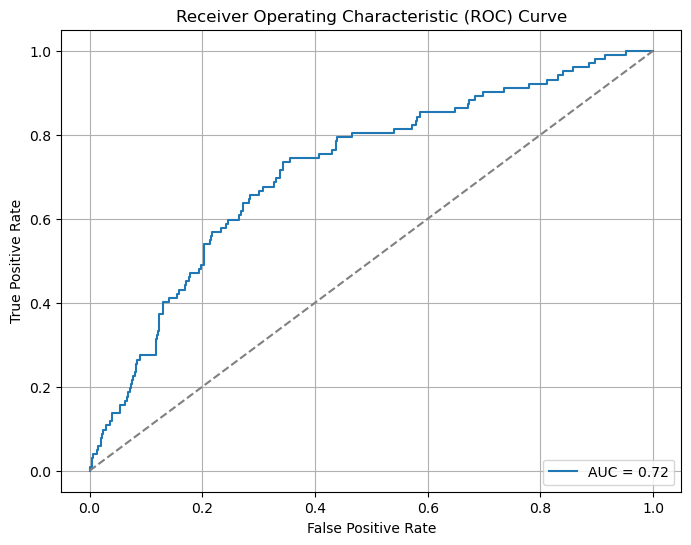

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1 (CHD)
y_prob = model_balanced.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Interpretation of AUC = 0.72

0.5 = no discrimination, like flipping a coin.

0.7–0.8 = acceptable/good: The model is doing a decent job of distinguishing between CHD and non-CHD cases.

The model is better than random and has useful predictive power, especially considering class imbalance and medical data complexity.

##### Summary of Current Model Performance:

Recall (CHD cases): 66% — great for catching high-risk individuals.

AUC Score: 0.72 — solid model separation ability.

Still room for improvement, especially in precision.



### Hyperparameter Tuning with GridSearchCV

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize and fit GridSearchCV
grid_sea = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_sea.fit(X_train, y_train)

# Get the best model
best_model = grid_sea.best_estimator_

# Optional: Check accuracy on test set
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))



Test Accuracy: 0.8510324483775811


In [146]:
# Import and fit the final model
from sklearn.linear_model import LogisticRegression

# Retrain with best params
best_log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)
best_log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_log_reg.predict(X_test_scaled)
y_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[574   2]
 [100   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       576
           1       0.50      0.02      0.04       102

    accuracy                           0.85       678
   macro avg       0.68      0.51      0.48       678
weighted avg       0.80      0.85      0.79       678

Accuracy Score: 0.8495575221238938
ROC AUC Score: 0.718120234204793


Recall for class 1 (CHD): Only 2% — the model is still struggling to correctly identify individuals at risk of CHD.

Precision for class 1: 50% — which means when the model does predict CHD, it's not often right.

This happens because of class imbalance: there are far fewer CHD cases (102) than non-CHD cases (576).

#### Apply SMOTE & Retrain the Model

In [147]:
pip install imblearn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\BestEmpireComputers\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Confusion Matrix:
 [[406 170]
 [ 32  70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80       576
           1       0.29      0.69      0.41       102

    accuracy                           0.70       678
   macro avg       0.61      0.70      0.61       678
weighted avg       0.83      0.70      0.74       678

Accuracy Score: 0.7020648967551623
ROC AUC Score: 0.7141714324618736


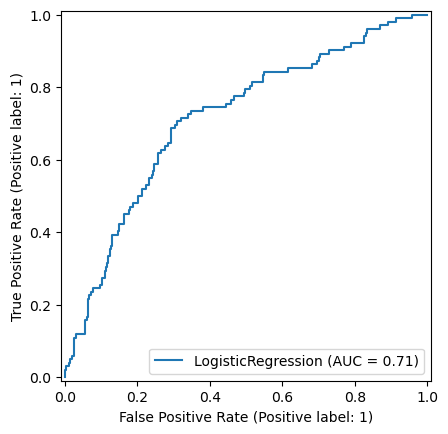

In [148]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

# 1. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 2. Retrain Logistic Regression with best hyperparameters
log_reg_smote = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# 3. Predict on the test set
y_pred_smote = log_reg_smote.predict(X_test_scaled)
y_proba_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("Accuracy Score:", accuracy_score(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))

# 5. Plot ROC Curve
RocCurveDisplay.from_estimator(log_reg_smote, X_test_scaled, y_test)


### Using Random Forest Classifier

#### Step 1: Apply SMOTE to Balance the Classes

In [149]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

# Re-apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Original dataset shape: {y_train.value_counts().to_dict()}")
print(f"Resampled dataset shape: {pd.Series(y_train_resampled).value_counts().to_dict()}")


Original dataset shape: {0: 2303, 1: 409}
Resampled dataset shape: {0: 2303, 1: 2303}


C:\Users\BestEmpireComputers\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


#### Step 2: Train the Random Forest Model

Confusion Matrix:
 [[525  51]
 [ 85  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       576
           1       0.25      0.17      0.20       102

    accuracy                           0.80       678
   macro avg       0.56      0.54      0.54       678
weighted avg       0.77      0.80      0.78       678


Accuracy Score: 0.799410029498525
ROC AUC Score: 0.6536032815904139


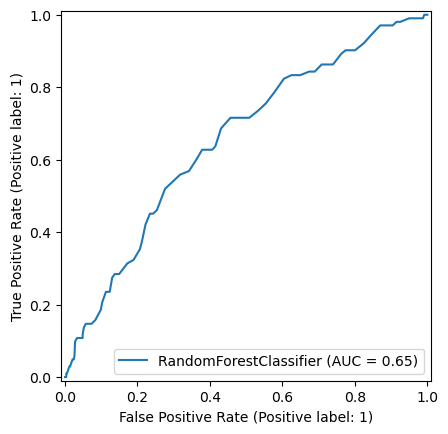

In [150]:
# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)


#### Random Forest + SMOTE

Recall (CHD): 17% 

Accuracy: 80% 

AUC: 0.65 (lower)

F1-score (CHD): 0.20 (very low)

#### Interpretation:

Performs well for non-CHD cases but fails to detect CHD effectively. Not suitable for early-risk identification.



| Model                       | Accuracy | CHD Recall | AUC  | CHD F1-Score | Interpretation                                                           |
| --------------------------- | -------- | ---------- | ---- | ------------ | ------------------------------------------------------------------------ |
| **LogReg + `class_weight`** | 71%      | 66%        | 0.72 | 0.40         | Balanced recall and AUC. Good for screening.                             |
| **LogReg + SMOTE**          | 70%      | **69%**    | 0.71 | **0.41**     | Slightly better recall. Recommended for early detection.                 |
| Random Forest + SMOTE       | **80%**  | 17%        | 0.65 | 0.20         | High accuracy but **poor recall**. Not suitable for CHD risk prediction. |


In [152]:
import pandas as pd

try:
    cleaned_data = pd.concat([X_scaled_df, y], axis=1)
    cleaned_data.to_csv("cleaned_chd_dataset.csv", index=False)
    print("Cleaned dataset saved successfully as 'cleaned_chd_dataset.csv'")
except Exception as e:
    print("Error while saving dataset:", e)


Cleaned dataset saved successfully as 'cleaned_chd_dataset.csv'


In [153]:
import pickle

with open("log_reg_model.pkl", "wb") as file:
    pickle.dump(log_reg_smote, file)
